# Assignment 4

## Sherwyn Braganza | Isaac McClanahan

**1) Use the make_moons dataset from scikit-learn with 500 samples, noise = 0.1 to make an artificial data-set.  This is a 2 class data-set.**

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt


features, targets = datasets.make_moons(n_samples=500, shuffle=True, noise=0.1)

**2) Split this into training and validation data (no test data necessary here.**

In [2]:
x_train, y_train = features[0:400], targets[0:400]
x_val, y_val = features[400:], targets[400:]

**3) Plot both the training and validation datasets.**

/var/folders/m2/6gn8k9tn0rz56ryvkbgdrwsr0000gn/T/ipykernel_21597/480005109.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


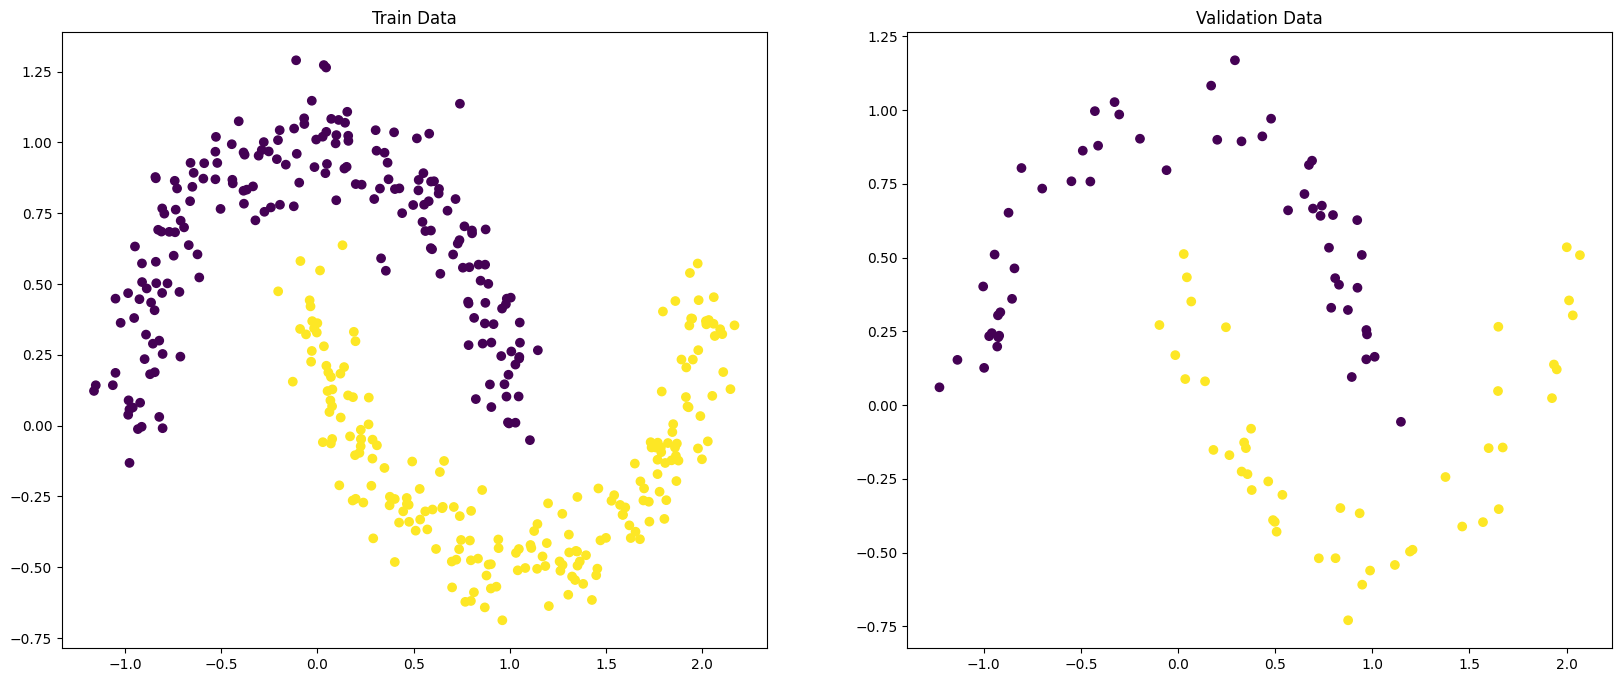

In [3]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(x_train[:,0], x_train[:,1], c=y_train)
axs[0].set_title('Train Data')
axs[1].scatter(x_val[:,0], x_val[:,1], c=y_val)
axs[1].set_title('Validation Data')
fig.set_figwidth(20)
fig.set_figheight(8)
fig.show()

**4) Implement a neural network model (that has reasonable performance) using the Sequential API.**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model_sequential = keras.Sequential(name="my_example_model")
model_sequential.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model_sequential.add(layers.Dense(32, activation="relu", name="my_second_layer"))
model_sequential.add(layers.Dense(1, activation="sigmoid", name="my_last_layer"))
model_sequential.build(input_shape=(None, 2))
model_sequential.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model_sequential.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val))

Metal device set to: Apple M1
Epoch 1/50


2022-11-01 21:13:54.451979: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-01 21:13:54.452066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-11-01 21:13:54.568615: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-01 21:13:54.791286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 553ms/step - loss: 0.7138 - accuracy: 0.2050 - val_loss: 0.6878 - val_accuracy: 0.6700
Epoch 2/50
1/1 [==============================] - 0s 32ms/step - loss: 0.6885 - accuracy: 0.6550 - val_loss: 0.6720 - val_accuracy: 0.8500
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 0.6707 - accuracy: 0.8725 - val_loss: 0.6593 - val_accuracy: 0.8100
Epoch 4/50
1/1 [==============================] - 0s 30ms/step - loss: 0.6562 - accuracy: 0.8575 - val_loss: 0.6485 - val_accuracy: 0.8000
Epoch 5/50
1/1 [==============================] - 0s 28ms/step - loss: 0.6440 - accuracy: 0.8450 - val_loss: 0.6388 - val_accuracy: 0.7900
Epoch 6/50
1/1 [==============================] - ETA: 0s - loss: 0.6332 - accuracy: 0.8425

2022-11-01 21:13:55.071618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 25ms/step - loss: 0.6332 - accuracy: 0.8425 - val_loss: 0.6299 - val_accuracy: 0.7900
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 0.6232 - accuracy: 0.8425 - val_loss: 0.6216 - val_accuracy: 0.7900
Epoch 8/50
1/1 [==============================] - 0s 33ms/step - loss: 0.6138 - accuracy: 0.8400 - val_loss: 0.6137 - val_accuracy: 0.7900
Epoch 9/50
1/1 [==============================] - 0s 33ms/step - loss: 0.6050 - accuracy: 0.8400 - val_loss: 0.6063 - val_accuracy: 0.7900
Epoch 10/50
1/1 [==============================] - 0s 28ms/step - loss: 0.5965 - accuracy: 0.8400 - val_loss: 0.5991 - val_accuracy: 0.7900
Epoch 11/50
1/1 [==============================] - 0s 32ms/step - loss: 0.5882 - accuracy: 0.8375 - val_loss: 0.5922 - val_accuracy: 0.7800
Epoch 12/50
1/1 [==============================] - 0s 30ms/step - loss: 0.5802 - accuracy: 0.8350 - val_loss: 0.5854 - val_accuracy: 0.7800
Epoch 13/50
1/1 [==================

**5) Plot the loss (of both training and validation) over the training epochs.**

/var/folders/m2/6gn8k9tn0rz56ryvkbgdrwsr0000gn/T/ipykernel_21597/3412825889.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


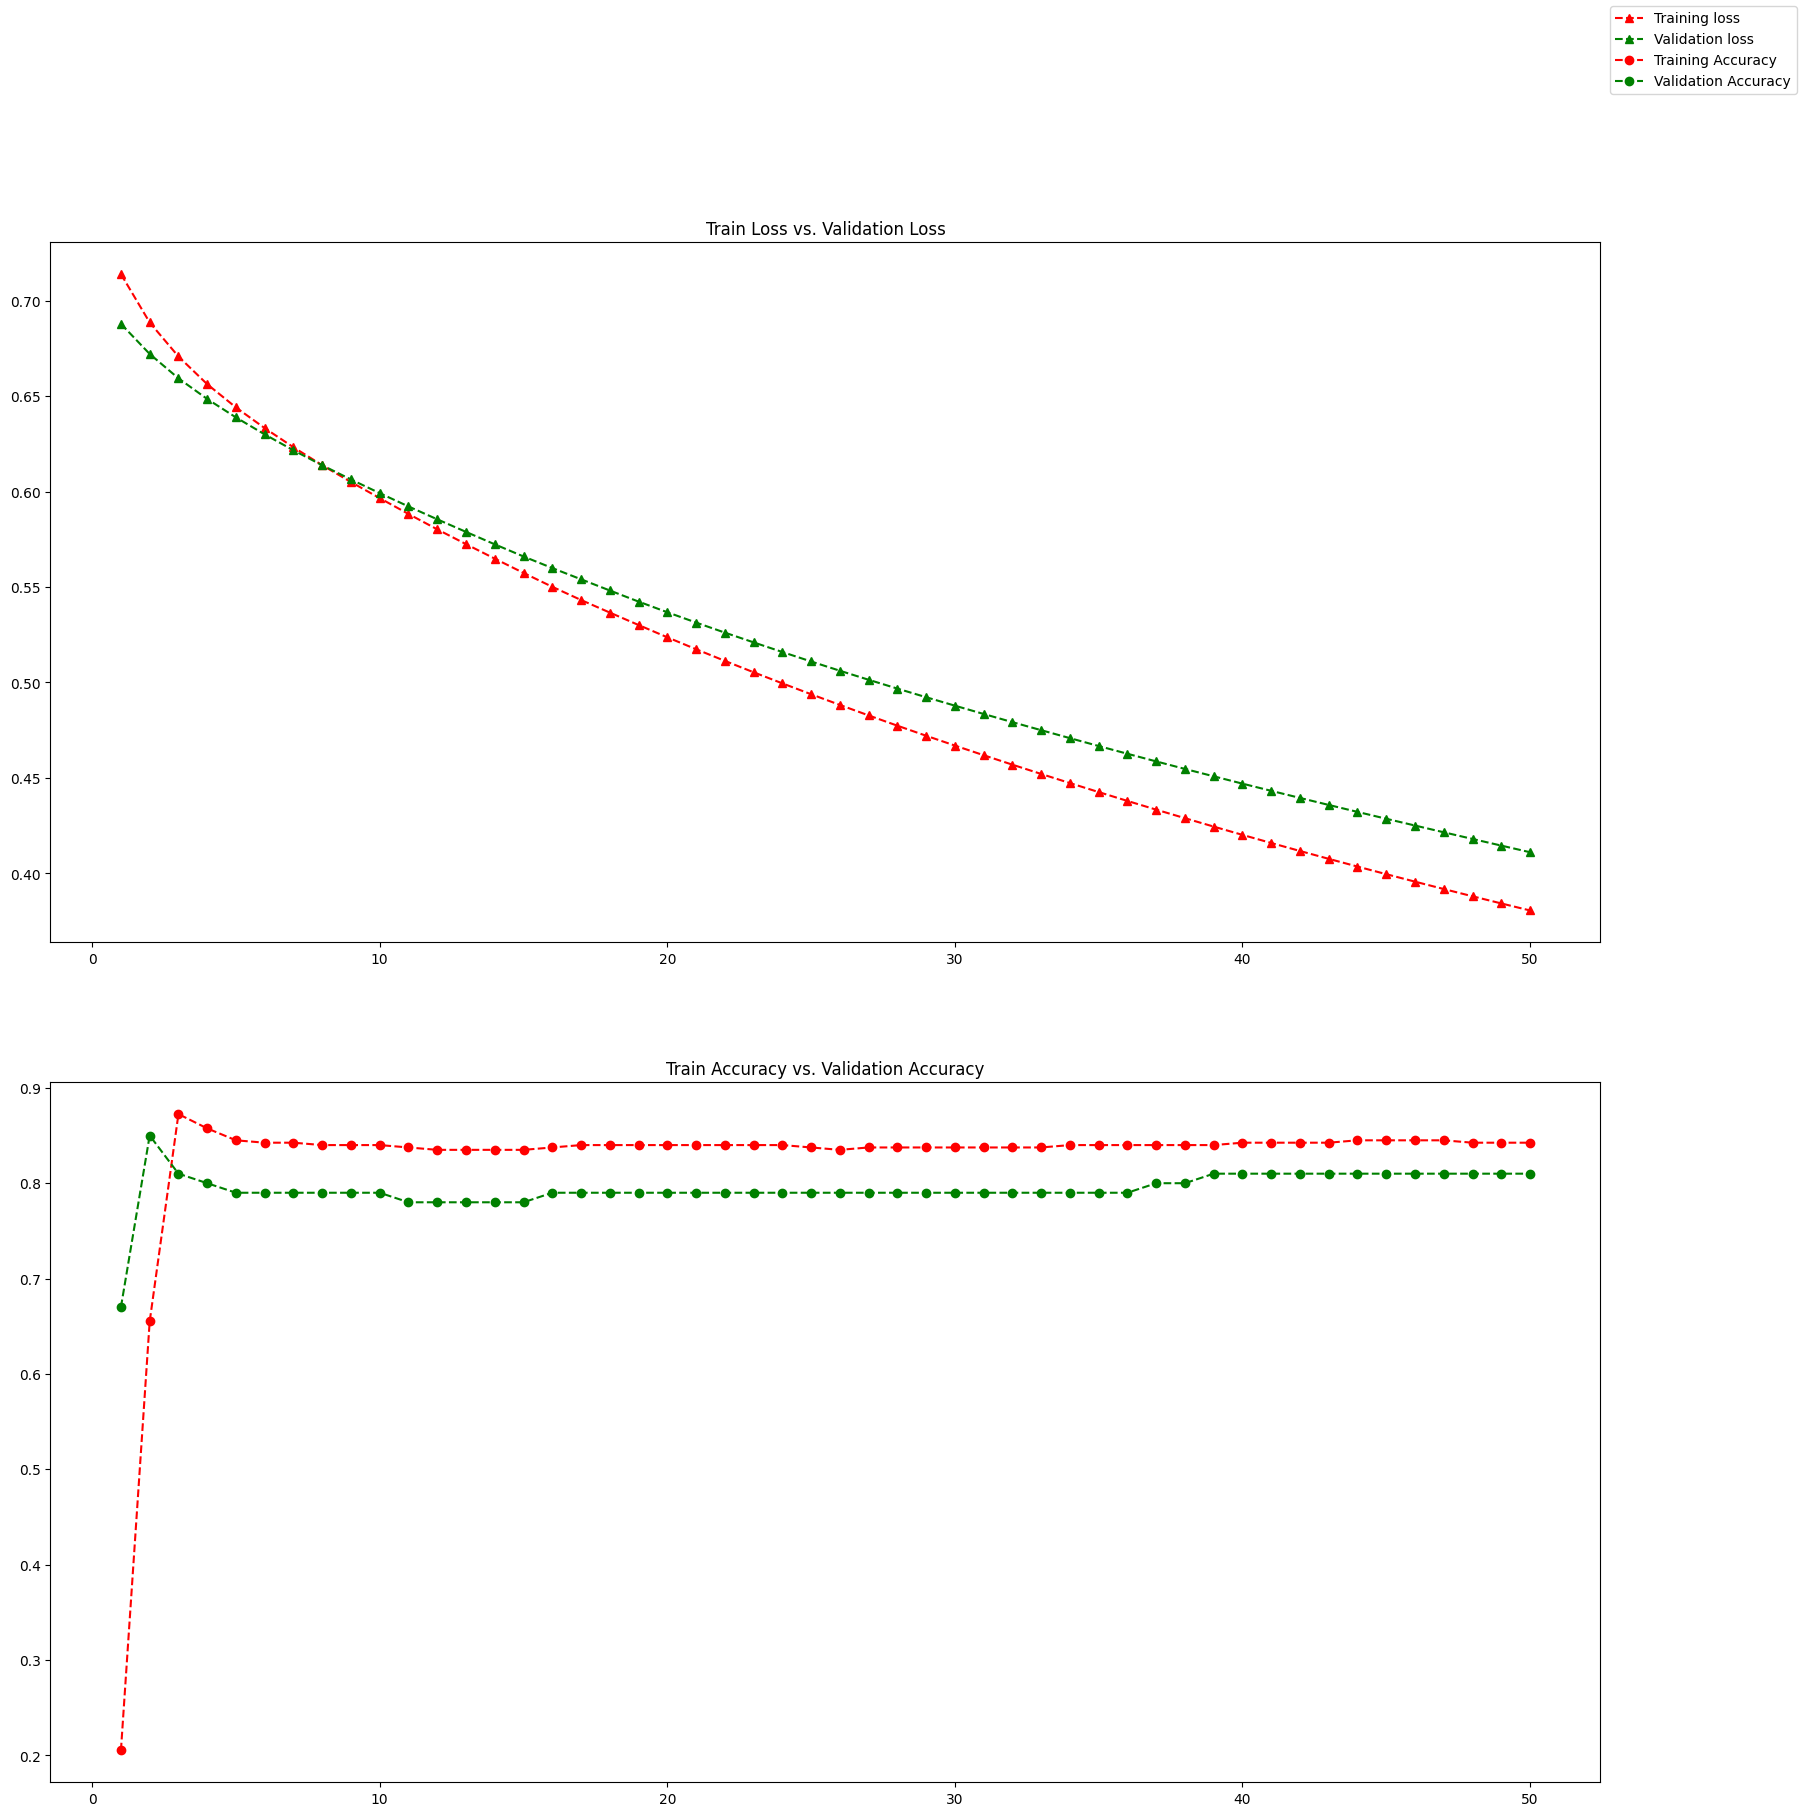

In [5]:
sequential_history = model_sequential.history.history

epochs = range(1, len(sequential_history['loss']) + 1)

fig, axs = plt.subplots(2)
axs[0].plot(epochs, sequential_history['loss'],
            label="Training loss", color = 'red', linestyle='--', marker = '^')
axs[0].plot(epochs, sequential_history['val_loss'],
            label="Validation loss", color = 'green', linestyle='--', marker = '^')
axs[0].set_title('Train Loss vs. Validation Loss')
axs[1].plot(epochs, sequential_history['accuracy'],
            label="Training Accuracy", color = 'red', linestyle='--', marker = 'o')
axs[1].plot(epochs, sequential_history['val_accuracy'],
            label="Validation Accuracy", color = 'green', linestyle='--', marker = 'o')
axs[1].set_title('Train Accuracy vs. Validation Accuracy')
fig.set_figwidth(20)
fig.set_figheight(20)
fig.legend()
fig.show()

**6) Plot the data _and_ the decision regions together on a new plot.**

4/4 [==============================] - 0s 6ms/step


2022-11-01 21:13:56.957928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


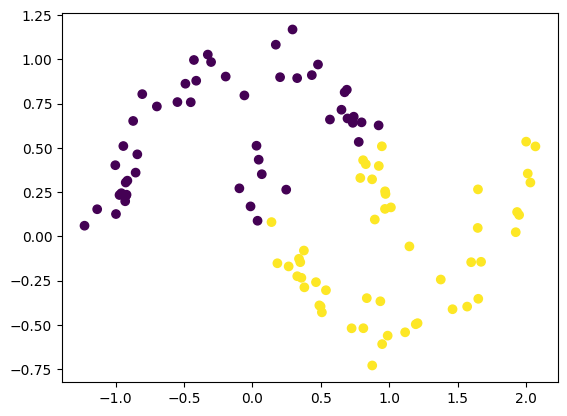

In [6]:
import numpy as np
predictions_sequential = np.round(model_sequential.predict(x_val))
xx, yy= np.meshgrid(x_val[:,0], x_val[:,1], sparse=True)
plt.scatter(xx, yy, c=predictions_sequential)
plt.show()